# Assigining Priority Levels to Endangered Species As a Data Scientist

Data Source: Acquired from [Codecademy](https://www.codecademy.com/learn), which says the data is "from the National Parks Service".

National Parks are large natural or near natural areas set aside to protect large-scale ecological processes, along with the complement of species and ecosystems characteristic of the area, which also provide a foundation for environmentally and culturally compatible spiritual, scientific, educational, recreational and visitor opportunities.[<sup>1</sup>](https://www.iucn.org/theme/protected-areas/about/protected-areas-categories/category-ii-national-park) In the United States, there are sixty-three national parks (not to be confused with other kinds of parks).[<sup>2</sup>](https://www.nps.gov/aboutus/national-park-system.htm) Former US President Barack Obama has been quoted as saying "This [National Parks] was America's best idea".[<sup>3</sup>](https://www.bing.com/videos/search?q=youtube+obama+national+park&docid=608019961633119782&mid=7F9501A986B7168EFD8F7F9501A986B7168EFD8F&view=detail&FORM=VIRE)

# The Problem

A Data Scientist can find themselves dealing with data from different fields of study. What if one day, as a data scientist, you were given a list of endangered species and tasked with creating a prioritization order for choosing which species to focus on, if manpower and resources are limited? We will pretend we are in that very situation here and explore a possible approach.

We have been given data from four American National Parks. Yosemite, Yellowstone, Bryce, and Great Smoky Mountains.

# Park Locations

<iframe src="https://www.google.com/maps/d/embed?mid=1gX-IcVkAyhvlZljzJMCmOUJ1jTef9ffD" width="640" height="480" title="Park_Locations"></iframe>

# Species Which Have Conservation Status Labels

<iframe src="Treemap1.html" width="800" height="600" title="Treemap1" style="border:none"></iframe>

Start by exploring the data we've been given. This Interactive Treemap contains different species grouped by taxonomic class and conservation status. Zoom in on different categories by clicking on its box. Zoom out by clicking on the navigation bar at the top of the figure. Reveal more information on different elements of the treemap by moving the cursor over it.

There are four different conservation status labels. In order to start assigning priority ,we need to understand these labels.
* **Species of Concern**. An informal term used to denote that a species might need conservation actions. "Species of concern" receive no legal protection and the use of the term does not necessarily mean that the species will eventually be proposed for listing as a threatened or endangered species.[<sup>4</sup>](https://www.fws.gov/midwest/es/soc/#:~:text=%22Species%20of%20concern%22%20is%20an%20informal%20term%20that,the%20populations%20and%20degree%20and%20types%20of%20threats.)
* **Endangered**. Any species which is in danger of extinction.[<sup>5</sup>](https://www.fws.gov/endangered/laws-policies/section-3.html) Defined explicitly in the United States Endangered Species Act. ESA sec. 3(6)
* **Threatened**.  Any species which is likely to become an endangered species within the foreseeable future.[<sup>5</sup>](https://www.fws.gov/endangered/laws-policies/section-3.html) Also defined explicitly in the United States Endangered Species Act. ESA sec. 3(20)
* **In Recovery**. The author could not find an official definition of "In Recovery". It could be referring to a species undergoing a recovery plan[<sup>6</sup>](https://www.esa.org/esa/wp-content/uploads/2016/01/Issue20.pdf)

Although *Species of Concern* dominates the group, we can narrow our focus only on *Endangered* and *Threatened* species, as those are the only ones offered legal protection at the moment.

There are 14 species listed as endangered and 9 different species listed as threatened. How would we choose which to prioritize? One of the criteria we can use is a species' level in the food pyramid, known as its trophic level. Here's an explainer from Brittanica.

**Trophic level**, step in a nutritive series, or food chain, of an ecosystem. The organisms of a chain are classified into these levels on the basis of their feeding behaviour. The first and lowest level contains the producers, green plants. The plants or their products are consumed by the second-level organisms—the herbivores, or plant eaters. At the third level, primary carnivores, or meat eaters, eat the herbivores; and at the fourth level, secondary carnivores eat the primary carnivores. These categories are not strictly defined, as many organisms feed on several trophic levels; for example, some carnivores also consume plant materials or carrion and are called omnivores, and some herbivores occasionally consume animal matter. A separate trophic level, the decomposers or transformers, consists of organisms such as bacteria and fungi that break down dead organisms and waste materials into nutrients usable by the producers.[<sup>7</sup>](https://www.britannica.com/science/trophic-level)

<table><tr><td><img src='https://cdn.britannica.com/00/95200-050-F0C768B9/Energy-flow-heat-loss-amount-biomass-land.jpg' width = 500></td><td><img src='https://cdn.britannica.com/92/180492-050-9389FB50/energy-pyramid-level-organisms-producers-flow-consumers.jpg' width = 550></td></tr></table>

Trophic pyramid, Image, Encyclopædia Britannica, https://www.britannica.com/science/trophic-level#/media/1/606492/165423, Access Date: May 9, 2021
Energy pyramid, Image, Encyclopædia Britannica, https://www.britannica.com/science/trophic-level#/media/1/606492/228957, Access Date: May 9, 2021


Notice the numerical values of energy, kcal, as you go from the bottom to the top. A general trend is that it goes down by a factor of ten each time you ascend a level. This is because an organism only stores 10% of the energy it eats as potential energy in its body. The rest is lost as heat energy or as kinetic energy used to move around and breathe. 

Another trend, more emphasized by the pyramid, is that there are less numbers of species towards the top. For our analysis this means that species at the top will be given more importance. If a species at the top goes extinct, there are less, or possibly even none, that are ready to take its place.

Why do we even require that all spaces on the pyramid be occupied? Every single place on the pyramid has an important function. The species at the top regulate the numbers of the species at the bottom. When a species near the bottom gets out of control it can eat up all the food supply, affecting all the other species in the whole ecosystem. Effects that ripple all the way from the top to the bottom of the pyramid are known as [trophic cascades](https://en.wikipedia.org/wiki/Trophic_cascade). A case study is the Gray Wolves of Yellowstone Park. In the 1920s, the Gray Wolves went locally extinct in the Park.

<img align="left" src='https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Trophic_Cascade_1.svg/800px-Trophic_Cascade_1.svg.png' width = 150>

Image Attribution:<br>
by <a href="//commons.wikimedia.org/wiki/User:Zirguezi" title="User:Zirguezi">User:Zirguezi</a><br>Original by <a href="//commons.wikimedia.org/wiki/File:Trophic_Cascade.svg" title="File:Trophic Cascade.svg">File:Trophic Cascade.svg</a> by <a href="//commons.wikimedia.org/w/index.php?title=User:Ccarroll17&amp;action=edit&amp;redlink=1" class="new" title="User:Ccarroll17 (page does not exist)">User:Ccarroll17</a>Grass is <a href="//commons.wikimedia.org/wiki/File:User-Pict-Spielwiese.svg" title="File:User-Pict-Spielwiese.svg">File:User-Pict-Spielwiese.svg</a> by <a href="//commons.wikimedia.org/wiki/User:Origami-Kranich" title="User:Origami-Kranich">User:Origami-Kranich</a>Trees is <a href="//commons.wikimedia.org/wiki/File:Meuble_h%C3%AAtre_au_naturel.svg" title="File:Meuble hêtre au naturel.svg">File:Meuble hêtre au naturel.svg</a> by <a href="//commons.wikimedia.org/w/index.php?title=User:Anceps&amp;action=edit&amp;redlink=1" class="new" title="User:Anceps (page does not exist)">User:Anceps</a>, <a href="//commons.wikimedia.org/wiki/User:Henrysalome" title="User:Henrysalome">User:Henrysalome</a>Deer is <a href="//commons.wikimedia.org/wiki/File:Meuble_h%C3%A9raldique_Cerf_passant.svg" title="File:Meuble héraldique Cerf passant.svg">File:Meuble héraldique Cerf passant.svg</a> by <a href="//commons.wikimedia.org/wiki/User:Syryatsu" title="User:Syryatsu">User:Syryatsu</a>Wolf is <a href="//commons.wikimedia.org/wiki/File:Wolf_vector_image.svg" title="File:Wolf vector image.svg">File:Wolf vector image.svg</a> by <a href="//commons.wikimedia.org/w/index.php?title=User:Publicdomainvectors&amp;action=edit&amp;redlink=1" class="new" title="User:Publicdomainvectors (page does not exist)">User:Publicdomainvectors</a> - Derivative of: <a class="external free" href="https://commons.wikimedia.org/wiki/File:Trophic_Cascade.svg">https://commons.wikimedia.org/wiki/File:Trophic_Cascade.svg</a> using:<br><a class="external free" href="https://commons.wikimedia.org/wiki/File:User-Pict-Spielwiese.svg">https://commons.wikimedia.org/wiki/File:User-Pict-Spielwiese.svg</a><br><a class="external free" href="https://commons.wikimedia.org/wiki/File:Meuble_h%C3%AAtre_au_naturel.svg">https://commons.wikimedia.org/wiki/File:Meuble_h%C3%AAtre_au_naturel.svg</a><br><a class="external free" href="https://commons.wikimedia.org/wiki/File:Meuble_h%C3%A9raldique_Cerf_passant.svg">https://commons.wikimedia.org/wiki/File:Meuble_h%C3%A9raldique_Cerf_passant.svg</a><br><a class="external free" href="https://commons.wikimedia.org/wiki/File:Wolf_vector_image.svg">https://commons.wikimedia.org/wiki/File:Wolf_vector_image.svg</a>, <a href="https://creativecommons.org/licenses/by/3.0" title="Creative Commons Attribution 3.0">CC BY 3.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=65498807">Link</a>

"Once the wolves were gone, elk populations began to rise. Over the next few years conditions of Yellowstone National Park declined drastically. A team of scientists visiting Yellowstone in 1929 and 1933 reported, "The range was in deplorable conditions when we first saw it, and its deterioration has been progressing steadily since then." By this time many biologists were worried about eroding land and plants dying off. The elk were multiplying inside the park and deciduous, woody species such as aspen and cottonwood suffered from overgrazing. The park service started trapping and moving the elk and, when that was not effective, killing them. Elk population control methods continued for more than 30 years. Elk control prevented further degradation of the range, but didn't improve its overall condition"[<sup>8</sup>](https://en.wikipedia.org/wiki/History_of_wolves_in_Yellowstone#Ecological_impacts)

The Gray Wolves were reintroduced into the park in the 1990s. As a result, the Elk populations were reduced, the plants in the park have recovered, and the overall health of the Yellowstone ecosystem has greatly improved. The wolves do not feed on the elk to the point of extinction, but they keep the elk population in check.[<sup>8</sup>](https://en.wikipedia.org/wiki/History_of_wolves_in_Yellowstone#Re-introduction_(1995%E2%80%93present))

Now that we have established the concept of trophic levels, we can start identifying the levels of the species in our data.

# Predators, Diet, and Trophic Levels of Our Species

After doing some internet research we've found information on the diet and predators of each of our species, which helped us assign trophic levels. We are only doing our best to assign trophic levels. In reality, there are many nuances and things to consider, such as a species being at different trophic levels throughout its life, like a tadpole that becomes a frog. We have two visualizations; a treemap(*Species information on hover*), and a trophic pyramid.

<iframe src="Treemap2.html" width="800" height="600" title="Treemap2" style="border:none"></iframe>

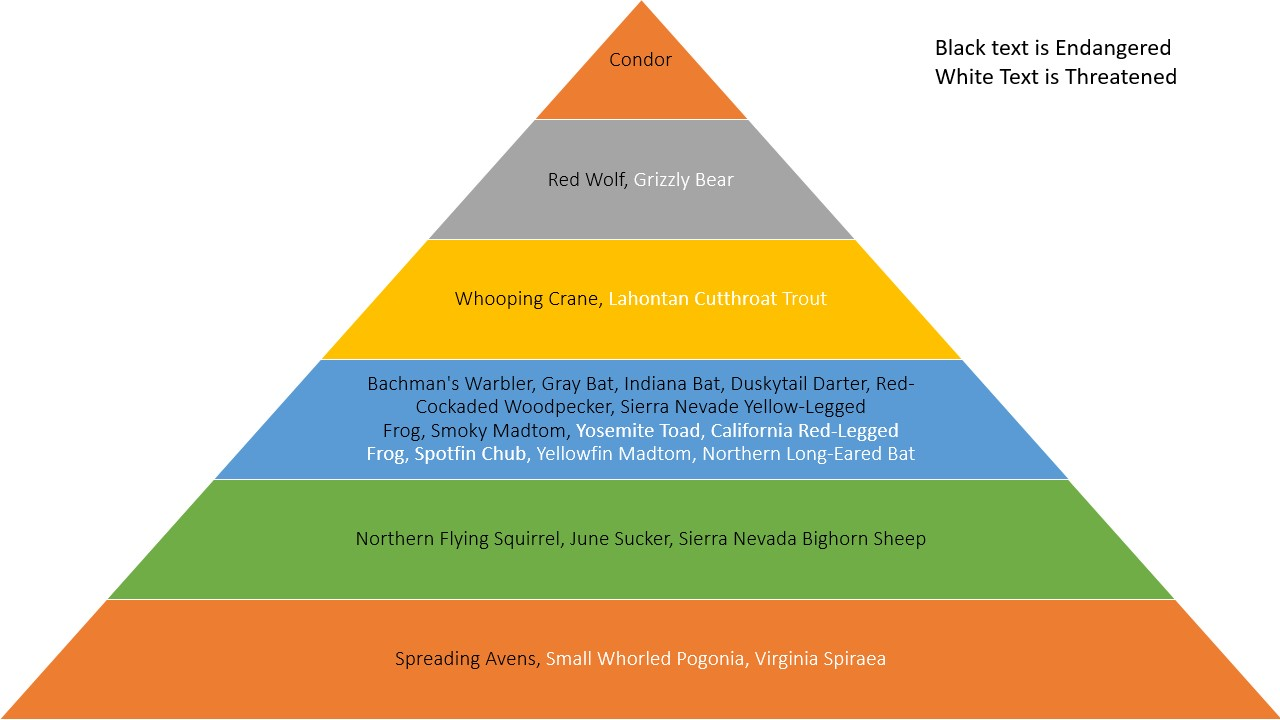

# Calculating Priority Score

Since `trophic_level` and `conservation_status` are both ordinal categorical values we can convert them into numerical values that we can use to calculate a priority score. We will assign values from 1 to 6 for `trophic_level`, and 1 to 2 for `conservation_status`. Next, we will [normalize](https://en.wikipedia.org/wiki/Normalization_(statistics)) the values of `trophic_level` and `conservation_status`. We are assuming equal distance between trophic levels (which is technically not ideal). A further step for refinement would be to do additional research and consultation to apply appropriate weights/distances to the trophic levels, which is beyond the scope of this article.



Our formula is

$$priority score = conservation status*trophic level$$

We are multiplying instead of adding because we are making the assumption that the factors involved are not independent of each other, rather, that they all can combine in the same ecosystem to create a compounding effect.[<sup>9</sup>](https://sites.tufts.edu/richardvogel/files/2020/04/Geometric-Mean-2020.pdf) This is reflected by the fact that the loss of a single species or habitat can have massive/cascading/chain-reaction effects throughout the whole system. 

In the figure below, the size of each box represents the relative importance of each species.

<iframe src="Treemap3.html" width="800" height="600" title="Treemap3" style="border:none"></iframe>

# Next Steps

There is much room for improvement. More factors can be added, and relative weights can be assigned to each factor. Additional factors for each species could be:

* Transformative effect on the environment
* Pollinator of plants
* Incubator of disease-causing microbes
* Current Population Estimate
* Size and range of animal habitat

A modified\* weighted product formula for decision-making  is

$$Priorityscore = \prod_{j=1}^{n}{a_{j}}^{w_j}$$

Applying the formula to get a prioritization score would be

$priority score = conservation status^{w_1}*trophic level^{w_2}*environmenttransform^{w_3}*pollinationlevel^{w_4}*DiseaseIncubation^{w_5}*Populationestimate^{w_6}*HabitatArea^{w_7}$

_*The full weighted product formula has a root of k, where k is the sum of all relative weights. We do not need it if we are only concerned with relative scale and not with exact central location._

# References

1. ["Category II: National Park"](https://www.iucn.org/theme/protected-areas/about/protected-areas-categories/category-ii-national-park). IUCN. 5 February 2016.
1. ["National Park System"](https://www.nps.gov/aboutus/national-park-system.htm). National Park Service. 9 May 2021.
1. National Geographic. (2016, June 19). ["America's Best Idea" - President Obama on National Parks | National Geographic](https://www.youtube.com/watch?v=cF2ZmWfnXDw). [Video]. YouTube.
1. ["Species of Concern"](https://www.fws.gov/midwest/es/soc/#:~:text=%22Species%20of%20concern%22%20is%20an%20informal%20term%20that,the%20populations%20and%20degree%20and%20types%20of%20threats.). US Fish & Wildlife Service. 9 May 2021.
1. ["Endangered Species Act | Section 3"](https://www.fws.gov/endangered/laws-policies/section-3.html). US Fish & Wildlife Service. 9 May 2021.
1. Evans *et al*. (Winter 2016). ["Species Recovery in the United States:
Increasing the Effectiveness of the
Endangered Species Act"](https://www.esa.org/esa/wp-content/uploads/2016/01/Issue20.pdf). Issues In Ecology. 9 May 2021.
1. ["Trophic Level"](https://www.britannica.com/science/trophic-level). In Encyclopædia Britannica online. 9 May 2021.
1. ["History of Wolves in Yellowstone"](https://en.wikipedia.org/wiki/History_of_wolves_in_Yellowstone#Ecological_impacts). Wikipedia. 9 May 2021
1. Richard M. Vogel (2020): [The geometric mean?](https://doi.org/10.1080/03610926.2020.1743313), Communications in Statistics - Theory and Methods, DOI: 10.1080/03610926.2020.1743313
